<a href="https://colab.research.google.com/github/katetarasenko/Practical8_Tarasenko/blob/main/Practical_8_FIT_4_10_TARASENKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path = '/content/drive/My Drive/Colab Notebooks/mushroom_cleaned.csv'

df = pd.read_csv(file_path)
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [cap-diameter, cap-shape, gill-attachment, gill-color, stem-height, stem-width, stem-color, season, class]
Index: []


In [ ]:
missing_values_per_row = df.isnull().sum(axis=1)

print(missing_values_per_row)

0        0
1        0
2        0
3        0
4        0
        ..
54030    0
54031    0
54032    0
54033    0
54034    0
Length: 54035, dtype: int64


In [ ]:
import pandas as pd

correlation_matrix = df.corr()

print(correlation_matrix)

                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000   0.204011         0.200481    0.186377   
cap-shape            0.204011   1.000000         0.043066    0.131387   
gill-attachment      0.200481   0.043066         1.000000    0.100276   
gill-color           0.186377   0.131387         0.100276    1.000000   
stem-height          0.135652  -0.010393        -0.075284    0.015057   
stem-width           0.828469   0.222494         0.245300    0.110283   
stem-color           0.121856   0.029035         0.020073    0.186090   
season               0.113334   0.055442        -0.040315    0.059965   
class               -0.165676  -0.133338        -0.052541   -0.063947   

                 stem-height  stem-width  stem-color    season     class  
cap-diameter        0.135652    0.828469    0.121856  0.113334 -0.165676  
cap-shape          -0.010393    0.222494    0.029035  0.055442 -0.133338  
gill-attachment    -0.075284    0.245300    

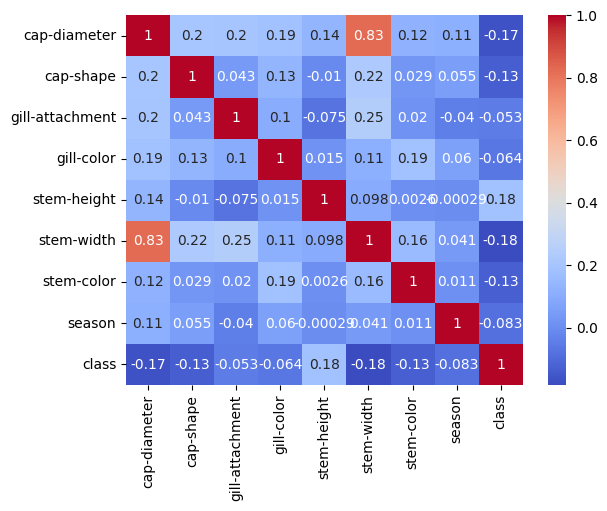

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


## RANDOM FOREST


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

X = df.drop('class', axis=1)
y = df['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 99.09%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807

[[4856   53]
 [  45 5853]]


# logistic regression

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
X = df.drop('class', axis=1)
y = df['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_reg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
coefficients = pd.DataFrame(log_reg_model.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)


Accuracy: 63.52%
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807

[[2617 2292]
 [1650 4248]]
                 Coefficient
cap-diameter       -0.000382
cap-shape          -0.087580
gill-attachment     0.016066
gill-color         -0.009346
stem-height         0.001614
stem-width         -0.000332
stem-color         -0.067156
season             -0.159608


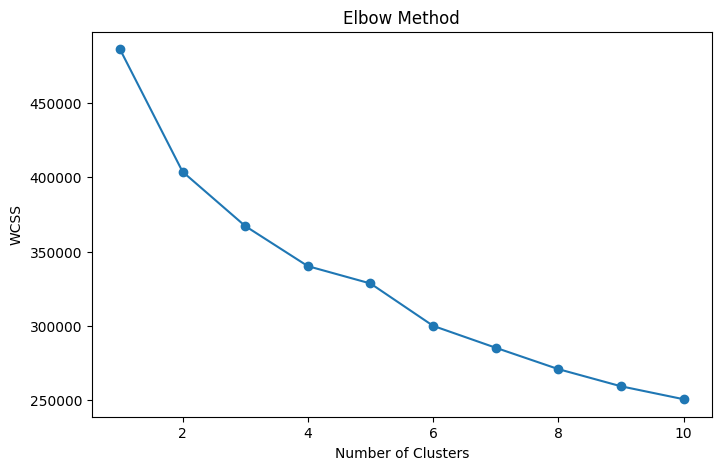

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,Cluster
0,1372,2,2,10,1447,1545,11,3,1,2
1,1461,2,2,10,1447,1557,11,3,1,2
2,1371,2,2,10,1399,1566,11,3,1,2
3,1261,6,2,10,1442,1566,11,3,1,2
4,1305,6,2,10,1424,1464,11,2,1,2


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)


df['Cluster'] = clusters
df.head()


SHILOUETTE METHOD

Silhouette Score: 0.45


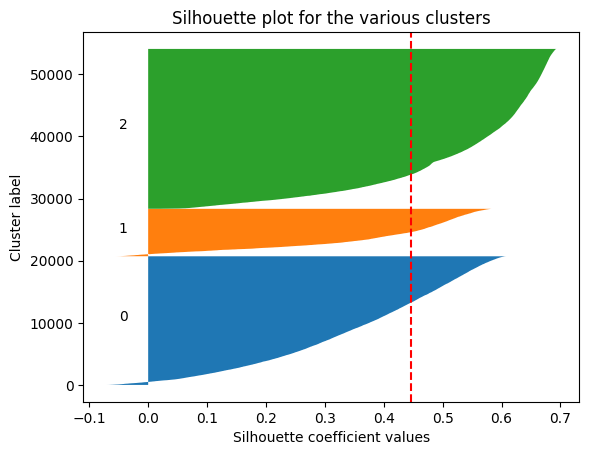

In [5]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
X = df.drop('class', axis=1)
from sklearn.cluster import KMeans


kmeans_model = KMeans(n_clusters=3, random_state=42)

kmeans_model.fit(X)

cluster_labels = kmeans_model.labels_
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, cluster_labels)

print(f'Silhouette Score: {sil_score:.2f}')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
n_clusters = 3

for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.title("Silhouette plot for the various clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.axvline(x=sil_score, color="red", linestyle="--")

plt.show()
